## First Part__TFIM
#### The Effect of Various External Bz on its Magnetic Properties

In this simulation, we suppose that there are a series of N spin particles in circular permutation to be our basic model. With this assumption, the Hamiltonian of the system can be calculated so that we can see the expected values of several physical properties by obtaining and analyzing its eigenvalues.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse.linalg import *
import scipy.sparse as sparse

First, we create $S^x$, $S^y$, $S^z$ as Pauli matrices multiplied with $\frac{1}{2}$, and define the Hamiltonians $H_x$, $H_{xx}$, $H_z$ as functions of $N$, the number of the spin particles, below.
$$ H_x(N) := \sum_{i}^{N} S^x_{i} $$
$$ H_{xx}(N) := \sum_{i, i+1}^{N} S^x_{i} S^x_{i+1} $$
$$ H_z(N) := \sum_{i}^{N} S^z_{i} $$
And according to the definition of Heisenberg spin Hamiltonian:

$$H = -hH_z-JH_{xx}$$

where $h$ represents the external magnetic field in z-direction, and $J$ is a ratio constant.

We'll later find out the eigenvalues and eigenvectors of Heisenberg spin Hamiltonian to illustrate the physical picture of this spin system.

In [2]:
Sx = np.array([[0,0.5],[0.5,0]])
Sy = np.array([[0,-0.5j],[0.5j,0]])
Sz = np.array([[0.5,0],[0,-0.5]])
I = np.array([[1,0],[0,1]])
sparse.csr_matrix(Sx)
sparse.csr_matrix(Sy)
sparse.csr_matrix(Sz)
sparse.csr_matrix(I)

# Useful algorithm: rotation
def Hx(N):
    M = [Sx]+ [I]*(N-1) + [Sx]+ [I]*(N-1)  #append: For example, [Sx, I, I, I] + [Sx, I, I, I] = [Sx, I, I, I, Sx, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hxx(N):
    M = [Sx]*2+ [I]*(N-2) + [Sx]*2+ [I]*(N-2)  #append: For example, [Sx, Sx, I, I] + [Sx, Sx, I, I] = [Sx, Sx, I, I, Sx, Sx, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

def Hz(N):
    M = [Sz]+ [I]*(N-1) + [Sz]+ [I]*(N-1)  #append: For example, [Sz, I, I, I] + [Sz, I, I, I] = [Sz, I, I, I, Sz, I, I, I]
    ans = []
    for i in range(N):
        tmp = np.array([1,])
        for j in range(N):
            tmp = sparse.kron(tmp, M[i + j],format='csr')  #M[i + j]: swift by one index with the change in i, and sweep with the change in j
        ans.append(tmp)
    return sum(ans)

Then, the Hamiltonians for $N$ = 4, 6, 8, 10, 12, 14, 16 are calculated below, and 6 figures are plotted:

#### Figure.1: the relation betweeen $E/N$ and $h$

#### Figure.2: the relation betweeen $\frac{d^2}{dh^2}(-E/N)$ and $h$

#### Figure.3: the relation betweeen $E_1-E_0$ (energy gap) and $h$

#### Figure.4: the relation betweeen $\langle m_z \rangle$ and $h$

#### Figure.5: the relation betweeen $| \langle E_0|H_X|E_1 \rangle |$ and $h$

#### Figure.6: the relation betweeen $1/(E_1-E_0)N$ and $h$

where $E_0(=E)$ is defined as the first eigenvalue of $H$, and $E_1$ is defined as the second eigenvalue of $H$.

The energy gap is then defined as $E_1-E_0$.

$\langle m_z \rangle$ is the expected value of magnetic moment in z-direction.

The meaning of $1/(E_1-E_0)N$ is $\frac{\xi}{N}$, where $\xi$ is defined as $1/(E_1-E_0)$, called "coherence length".

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:65: RuntimeWarning: divide by zero encountered in true_divide


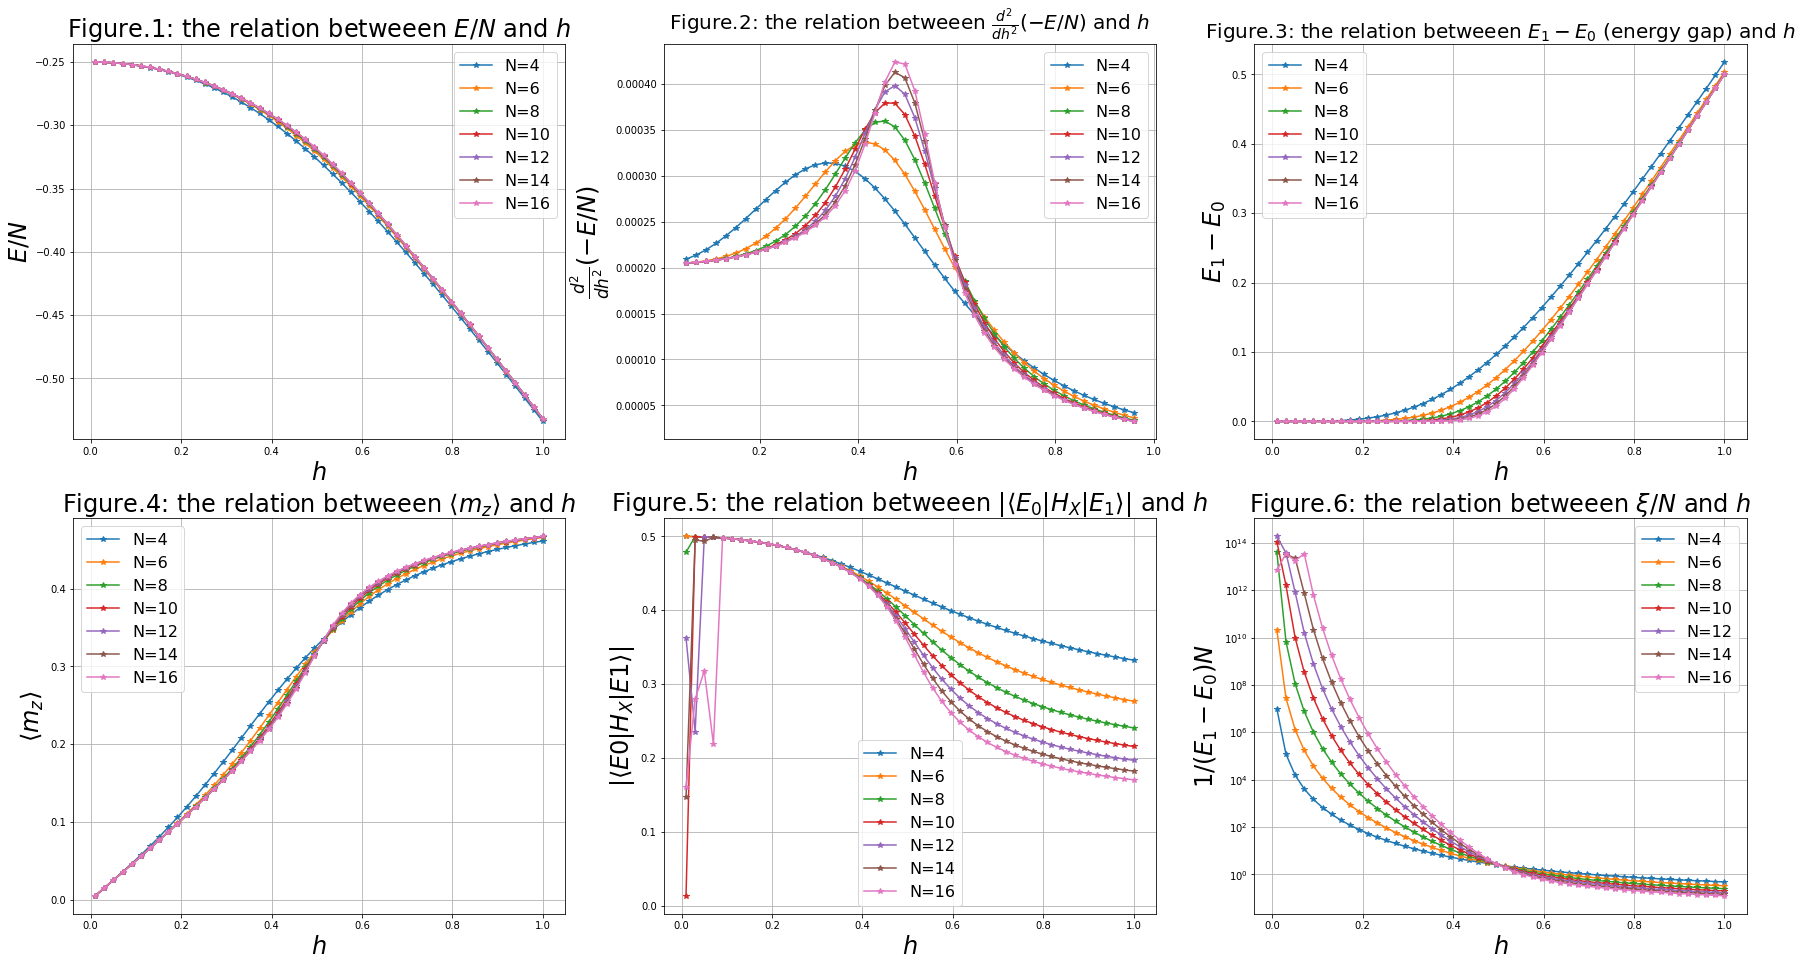

In [3]:
fig, ax = plt.subplots(ncols=3, nrows=2, figsize=(10*3,8*2))
ax = ax.flatten()
J = 1

for N in [4, 6, 8, 10, 12, 14, 16]:
    h = np.linspace(0.01,1)
    E0 = np.zeros_like(h)
    E1 = np.zeros_like(h)      
    mx = np.zeros_like(h)
    mz = np.zeros_like(h)
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)
    sparse.csr_matrix(mx)
    sparse.csr_matrix(mz)

    for i in range(h.shape[0]):
        H = -J*Hxx(N)-h[i]*Hz(N)
        w, v = eigsh(H, 2, which='SA')
        E0[i] = w[0]
        E1[i] = w[1]
        mx[i] = v[:,1]@Hx(N)@v[:,0]/N
        mz[i] = v[:,0]@Hz(N)@v[:,0]/N

    # E
    ax[0].plot(h, E0/N, '*-',label='N={}'.format(N))
    ax[0].legend(fontsize=16)
    ax[0].set_title(r"Figure.1: the relation betweeen $E/N$ and $h$",fontsize=24)
    ax[0].set_xlabel(r'$h$',fontsize=24)
    ax[0].set_ylabel(r'$E/N$',fontsize=24)
    ax[0].grid()
    
    # d^2E/Eh^2
    ax[1].plot(h[2:-2], np.gradient(np.gradient(-E0/N))[2:-2], '*-', label='N={}'.format(N))
    ax[1].legend(fontsize=16)
    ax[1].set_title(r"Figure.2: the relation betweeen $\frac{d^2}{dh^2}(-E/N)$ and $h$",fontsize=20)
    ax[1].set_xlabel(r'$h$',fontsize=24)
    ax[1].set_ylabel(r'$\frac{d^2}{dh^2}(-E/N)$',fontsize=24)
    ax[1].grid()    
    
    # gap
    ax[2].plot(h, E1-E0, '*-',label='N={}'.format(N))
    ax[2].legend(fontsize=16)
    ax[2].set_title(r"Figure.3: the relation betweeen $E_1-E_0$ (energy gap) and $h$",fontsize=20)
    ax[2].set_xlabel(r'$h$',fontsize=24)
    ax[2].set_ylabel(r'$E_1-E_0$',fontsize=24)
    ax[2].grid()

    # mz
    ax[3].plot(h, mz, '*-',label='N={}'.format(N))
    ax[3].legend(fontsize=16)
    ax[3].set_title(r"Figure.4: the relation betweeen $\langle m_z \rangle$ and $h$",fontsize=24)
    ax[3].set_xlabel(r'$h$',fontsize=24)
    ax[3].set_ylabel(r'$\langle m_z \rangle$',fontsize=24)
    ax[3].grid()   
    
    # mx
    ax[4].plot(h, np.abs(mx), '*-',label='N={}'.format(N))
    ax[4].legend(fontsize=16)
    ax[4].set_title(r"Figure.5: the relation betweeen $| \langle E_0|H_X|E_1 \rangle |$ and $h$",fontsize=24)
    ax[4].set_xlabel(r'$h$',fontsize=24)
    ax[4].set_ylabel(r'$| \langle E0|H_X|E1 \rangle |$',fontsize=24)
    ax[4].grid() 
    
    # xi/L
    ax[5].plot(h, 1/((E1-E0)*N), '*-', label='N={}'.format(N))
    ax[5].legend(fontsize=16)
    ax[5].set_title(r"Figure.6: the relation betweeen $\xi/N$ and $h$",fontsize=24)
    ax[5].set_xlabel(r'$h$',fontsize=24)
    ax[5].set_ylabel(r'$1/(E_1-E_0)N$',fontsize=24)
    ax[5].semilogy()
    ax[5].grid()   

Now, let's take a close look at the 6th figure (being enlarged in the figure below), the relation betweeen $1/(E_1-E_0)N$ and $h$. We can notice that the intersections of functions of $N$ and $N+2$ are not at the same place.

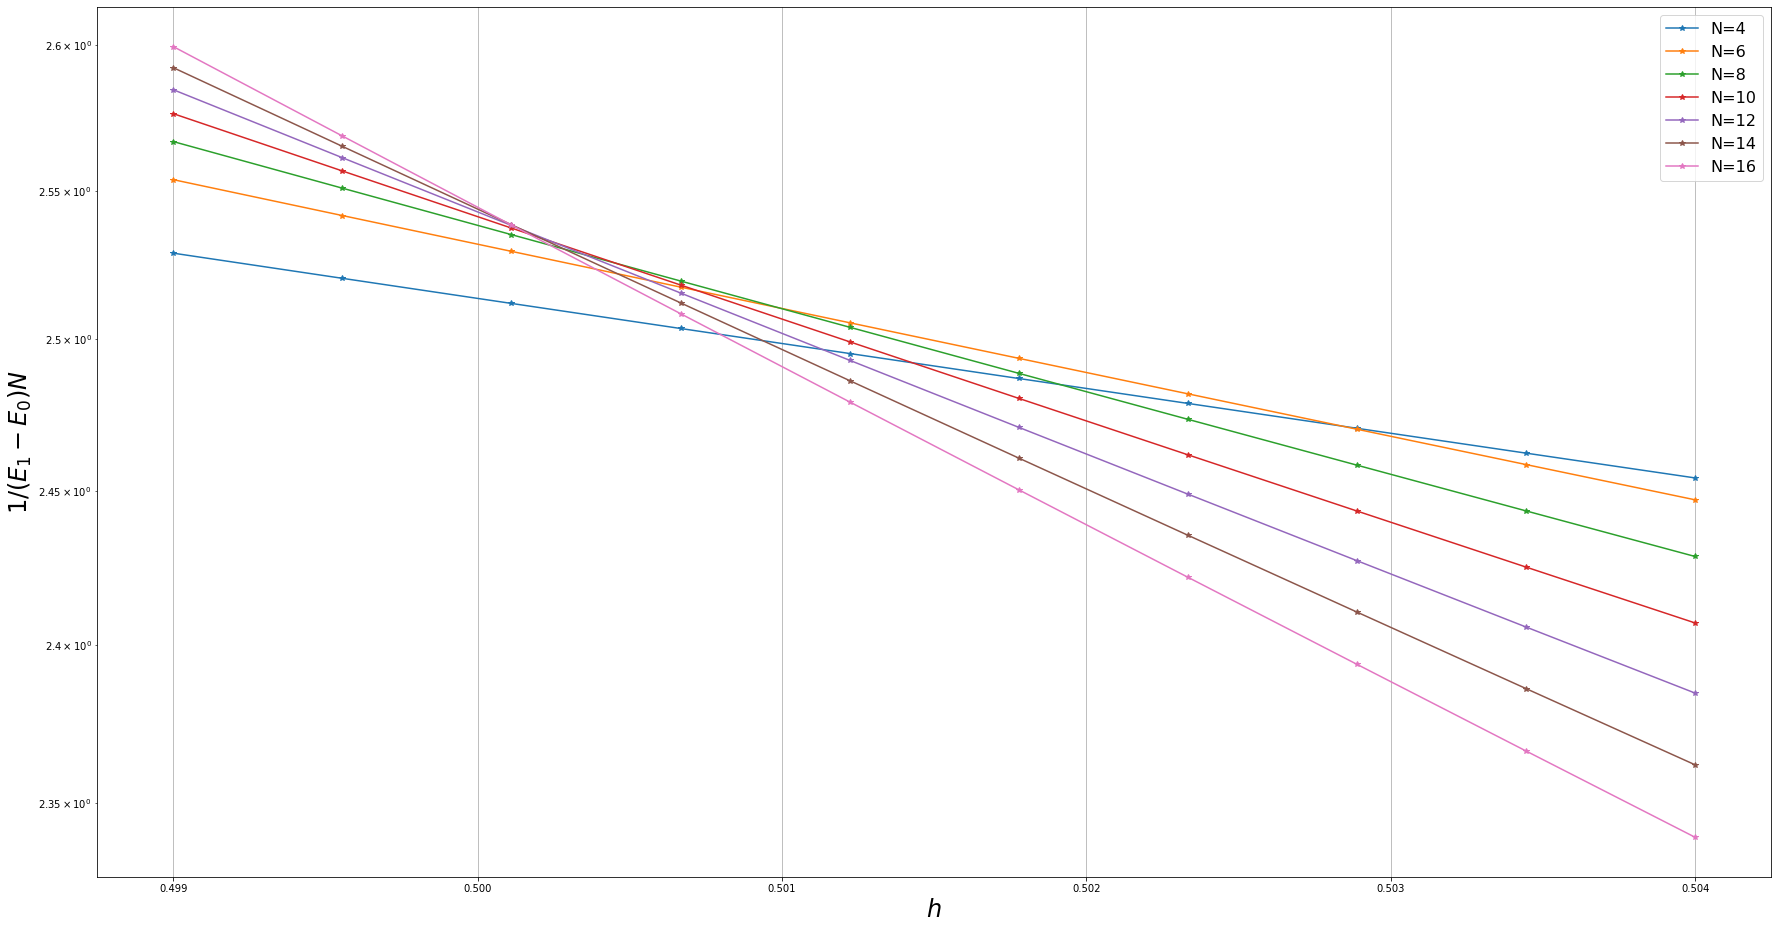

In [4]:
fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10*3,8*2))

for N in [4, 6, 8, 10, 12, 14, 16]:
    h = np.linspace(0.499,0.504,10)
    E0 = np.zeros_like(h)
    E1 = np.zeros_like(h)      
    mx = np.zeros_like(h)
    mz = np.zeros_like(h)
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)
    sparse.csr_matrix(mx)
    sparse.csr_matrix(mz)

    for i in range(h.shape[0]):
        H = -J*Hxx(N)-h[i]*Hz(N)
        w, v = eigsh(H, 2, which='SA')
        E0[i] = w[0]
        E1[i] = w[1]
        mx[i] = v[:,1]@Hx(N)@v[:,0]/N
        mz[i] = v[:,0]@Hz(N)@v[:,0]/N

    # xi/L
    ax.plot(h, 1/((E1-E0)*N), '*-', label='N={}'.format(N))
    ax.legend(fontsize=16)
    ax.set_xlabel(r'$h$',fontsize=24)
    ax.set_ylabel(r'$1/(E_1-E_0)N$',fontsize=24)
    ax.semilogy()
    ax.grid()    

Thus, we are now going to find out at which $h$ the intersections happen for different $N$. The $h$ where the intersections happen is written as $h^*$. Here, since the data are discrete, in order to find out the intersections, we used the method of "Linear Interpolation" and the "Intermediate Value Theorem". Then we may obtain the relation between $h^*$ and $\frac{1}{N}$ shown in the figure below.

In [5]:
h = np.linspace(0.495,0.505)
J = 1
save = np.zeros([100, h.shape[0]+1])
sparse.csr_matrix(save)
for N in [4, 6, 8, 10, 12, 14, 16]:
    E0 = np.zeros_like(h)
    E1 = np.zeros_like(h)      
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)

    for i in range(h.shape[0]):
        H = -J*Hxx(N)-h[i]*Hz(N)
        w, v = eigsh(H, 2, which='SA')
        E0[i] = w[0]
        E1[i] = w[1]
        save[N][i] =  1/((E1[i]-E0[i])*N)

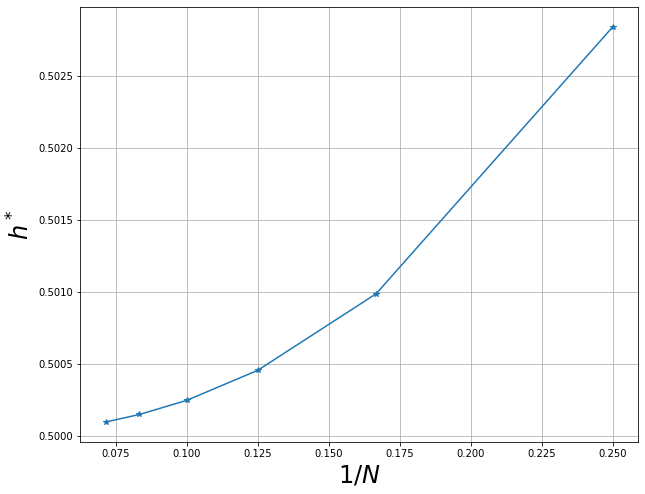

In [6]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
x = np.zeros(100)
for N in [4, 6, 8, 10, 12, 14]:
    for i in range(h.shape[0]):
        if (save[N][i]-save[N+2][i])*(save[N][i+1]-save[N+2][i+1]) < 0:
            m1 = (save[N][i]-save[N][i+1])/(h[i]-h[i+1])
            m2 = (save[N+2][i]-save[N+2][i+1])/(h[i]-h[i+1])
            x[int((N-4)/2)] = (save[N+2][i]-save[N][i])/(m1 - m2) + h[i]

Ns = [1/4, 1/6, 1/8, 1/10, 1/12, 1/14]            
# h*
ax.plot(Ns, x[:len(Ns)], '*-')
ax.set_xlabel(r'$1/N$',fontsize=24)
ax.set_ylabel(r'$h^*$',fontsize=24)
ax.grid()

We can predict from the figure above that there will be an y-intercept when $N \to \infty$, and we call it "critical $h$", $h_c$. We aim to find out the value of $h_c$ by fitting data with an exponential function, $ax^b+c$. The value of $c$ we obtain will be $h_c$ we are looking for.

In [7]:
from scipy.optimize import curve_fit
def func(x, a, b, c):
    return a*(x**(-b))+ c
xdata = np.array([4, 6, 8, 10, 12, 14])
ydata = x[:len(xdata)]
popt, pcov = curve_fit(func, xdata, ydata)
print("[a, b, c] = ", popt)
critical_h = popt[2]
print("The critical h is: ",critical_h)

[a, b, c] =  [0.10279846 2.58420877 0.49998185]
The critical h is:  0.4999818543894666


After determining the $h_c$ as approximately $0.49998$ and other parameters, we make the original data overlap the fitting formula and see whether the fitting was good.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in true_divide
  del sys.path[0]


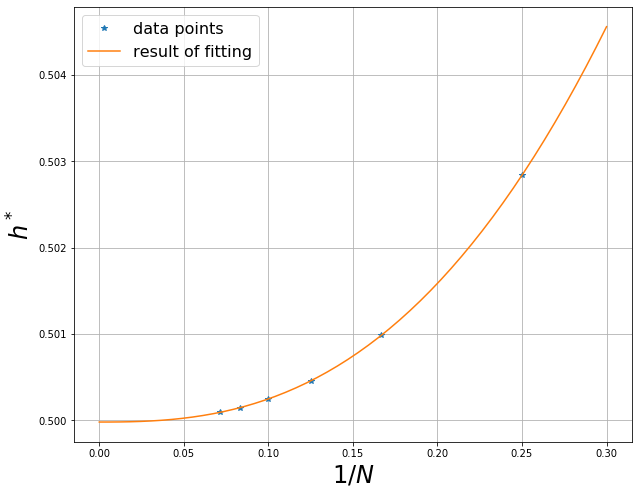

In [8]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))
for N in [4, 6, 8, 10, 12]:
    for i in range(h.shape[0]):
        if (save[N][i]-save[N+2][i])*(save[N][i+1]-save[N+2][i+1]) < 0:
            m1 = (save[N][i]-save[N][i+1])/(h[i]-h[i+1])
            m2 = (save[N+2][i]-save[N+2][i+1])/(h[i]-h[i+1])
            x[int((N-4)/2)] = (save[N+2][i]-save[N][i])/(m1 - m2) + h[i]

test_recipical_N = np.linspace(0, 0.3)

# h* fitting
ax.plot(1/np.array(xdata), x[:len(xdata)], '*', label='data points')
ax.plot(test_recipical_N, func(1/test_recipical_N, *popt), '-', label='result of fitting')
ax.legend(fontsize=16)
ax.set_xlabel(r'$1/N$',fontsize=24)
ax.set_ylabel(r'$h^*$',fontsize=24)
ax.grid() 

From the figure above, we can tell the result of fitting was very great. When the external magnetic field in z-direction reaches $h_c$, it satisfies $\xi = const*N^\nu$. So, when we take log of both sides of the formula, we get $\log{\xi} = const + \nu \log{N}$.

Now, we are going to check whether $\log{\xi}$ and $\log{N}$ have a linear relationship, and find out the slope, $\nu$, by fitting it with a linear formula, $ax+b$.

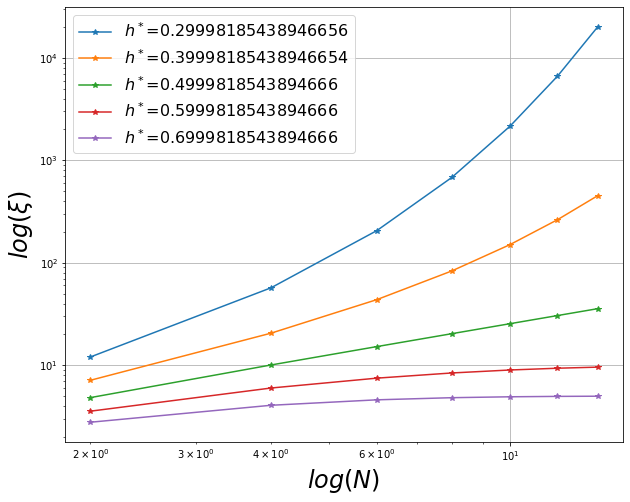

In [9]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))

N = np.array([2,4,6,8,10,12,14])

h_= np.array([critical_h - 0.2, critical_h - 0.1, critical_h, critical_h + 0.1, critical_h + 0.2])

for i in range(h_.shape[0]):
    E0 = np.zeros_like(N)
    E1 = np.zeros_like(N)
    E0 = E0.astype(float)
    E1 = E1.astype(float)      
    sparse.csr_matrix(E0)
    sparse.csr_matrix(E1)
    for j in range(N.shape[0]):
        H = -J*Hxx(N[j])-h_[i]*Hz(N[j])
        w, v = eigsh(H, 2, which='SA')
        E0[j] = w[0]
        E1[j] = w[1]
        
    # xi
    ax.plot(N, 1/(E1-E0), '*-', label='$h^*$={}'.format(h_[i]))
    ax.legend(fontsize=16)
    ax.set_xlabel(r'$log(N)$',fontsize=24)
    ax.set_ylabel(r'$log(\xi)$',fontsize=24)
    ax.semilogy()
    ax.semilogx()
    ax.grid()    

From the figure above, we can see the linearity of $\log{\xi}$ and $\log{N}$ is for sure when $h^* = h_c$. Then, we start the fitting.

In [10]:
E0 = np.zeros_like(N)
E1 = np.zeros_like(N)
E0 = E0.astype(float)
E1 = E1.astype(float)      
sparse.csr_matrix(E0)
sparse.csr_matrix(E1)
for j in range(N.shape[0]):
    H = -J*Hxx(N[j])-critical_h*Hz(N[j])
    w, v = eigsh(H, 2, which='SA')
    E0[j] = w[0]
    E1[j] = w[1]

from scipy.optimize import curve_fit
def critical_func(x, a, b):
    return a*x + b
xdata = np.log(N)
ydata = np.log(1/(E1-E0))

In [11]:
popt, pcov = curve_fit(critical_func, xdata, ydata)
print(popt)
nyu = popt[0]
print(nyu)

[1.02484593 0.87603267]
1.0248459343428695


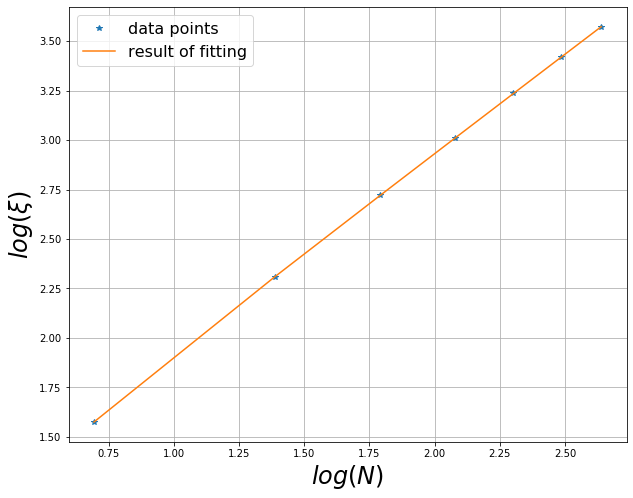

In [12]:
ig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,8))

E0 = np.zeros_like(N)
E1 = np.zeros_like(N)
E0 = E0.astype(float)
E1 = E1.astype(float)      
sparse.csr_matrix(E0)
sparse.csr_matrix(E1)
for j in range(N.shape[0]):
    H = -J*Hxx(N[j])-critical_h*Hz(N[j])
    w, v = eigsh(H, 2, which='SA')
    E0[j] = w[0]
    E1[j] = w[1]

# xi fitting
ax.plot(np.log(N), np.log(1/(E1-E0)), '*', label='data points')
ax.plot(xdata, ydata, '-', label='result of fitting')
ax.legend(fontsize=16)
ax.set_xlabel(r'$log(N)$',fontsize=24)
ax.set_ylabel(r'$log(\xi)$',fontsize=24)
ax.grid()    

From the fitting above, we can determine $\nu$ as approximately $1.02485$, and from the figure above, we can see the fitting was very great.

This is the end of the first part of simulation. Thank you for letting me have your time.